In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import load_img
import os
import wget
import warnings

In [54]:
#Define data inputs and outputs

In [55]:
input_path=[]
Petlabel=[]
for class_input in os.listdir('PetImages'):
    for path in os.listdir('PetImages/'+class_input):
        if class_input == 'Cats':
            Petlabel.append(0)
        else:
            Petlabel.append(1)
        input_path.append(os.path.join("PetImages", class_input, path))
        

In [56]:
print(input_path[0],Petlabel[0])

PetImages\Cats\0.jpg 0


In [57]:
#Create dataframe

In [80]:
df =pd.DataFrame()
df['Images']= input_path
df['Petlabel']=Petlabel
df.Petlabel=df['Petlabel'].astype(str)
# SHUFFLING DATA
df = df.sample(frac=1).reset_index(drop=True)
df.head(20)

,Images,Petlabel
0,PetImages\Cats\7.jpg,0
1,PetImages\Cats\31.jpg,0
2,PetImages\Cats\63.jpg,0
3,PetImages\Dogs\33.jpg,1
4,PetImages\Cats\25.jpg,0
5,PetImages\Cats\13.jpg,0
6,PetImages\Dogs\1.jpg,1
7,PetImages\Cats\32.jpg,0
8,PetImages\Cats\35.jpg,0
9,PetImages\Cats\21.jpg,0


In [92]:
from keras.preprocessing.image import ImageDataGenerator

In [93]:
from keras import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [97]:
# Define Normalization Prameters 
train_generator = ImageDataGenerator(
            rescale = 1./255,
            rotation_range = 40, # to avoid overfitting
            shear_range = 0.2,
            zoom_range = 0.2,
            horizontal_flip = True,
            fill_mode = 'nearest')

train_iterator = train_generator.flow_from_dataframe(
            df,
            x_col='Images',
            y_col='Petlabel',
            target_size=(158,158),
            batch_size=512,
            class_mode='binary'
)

Found 103 validated image filenames belonging to 2 classes.


In [98]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size=0.2,random_state=42)

In [99]:
val_generator = ImageDataGenerator(rescale = 1./255)
val_iterator = val_generator.flow_from_dataframe(
            test,
            x_col='Images',
            y_col='Petlabel',
            target_size=(158,158),
            batch_size=512,
            class_mode='binary'
)


Found 21 validated image filenames belonging to 2 classes.


In [100]:
# Model Creation

In [101]:
Model = Sequential([
    Conv2D(16,(3,3),activation='relu',input_shape=(158,158,3)),
    MaxPool2D((2,2)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(1,activation= 'sigmoid')
    
])

In [102]:
import tensorflow.keras.optimizers
Model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
Model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 156, 156, 16)      448       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 78, 78, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 76, 76, 32)        4640      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 36, 36, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 20736)            

In [103]:
# Model Train

In [104]:
Model_train=Model.fit(train_iterator,epochs=50, validation_data=val_iterator)


Epoch 1/50


C:\Users\mayar\anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py:976: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


1/1 [==============================] - 19s 19s/step - loss: 0.6885 - accuracy: 0.6214 - val_loss: 5.6304 - val_accuracy: 0.6667
Epoch 2/50
1/1 [==============================] - 6s 6s/step - loss: 5.4537 - accuracy: 0.6602 - val_loss: 1.7182 - val_accuracy: 0.6667
Epoch 3/50
1/1 [==============================] - 8s 8s/step - loss: 1.6775 - accuracy: 0.6602 - val_loss: 1.1479 - val_accuracy: 0.3333
Epoch 4/50
1/1 [==============================] - 7s 7s/step - loss: 1.1386 - accuracy: 0.3398 - val_loss: 1.1305 - val_accuracy: 0.3333
Epoch 5/50
1/1 [==============================] - 8s 8s/step - loss: 1.1170 - accuracy: 0.3398 - val_loss: 0.8890 - val_accuracy: 0.3333
Epoch 6/50
1/1 [==============================] - 7s 7s/step - loss: 0.8829 - accuracy: 0.3398 - val_loss: 0.7248 - val_accuracy: 0.3333
Epoch 7/50
1/1 [==============================] - 7s 7s/step - loss: 0.7238 - accuracy: 0.3495 - val_loss: 0.6589 - val_accuracy: 0.7143
Epoch 8/50
1/1 [==============================] - 

<Figure size 432x288 with 0 Axes>

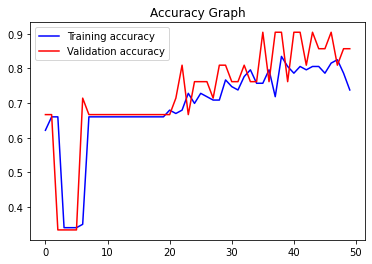

<Figure size 432x288 with 0 Axes>

In [109]:
# evaluate model
acc = Model_train.history['accuracy']
val_acc = Model_train.history['val_accuracy']
epochs= range(len(acc))
plt.plot(epochs,acc,'b',label='Training accuracy')
plt.plot(epochs,val_acc,'r',label='Validation accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()